In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from matplotlib import animation, rc
from IPython.display import HTML

from time import sleep
from IPython.display import clear_output

import collections
import sys

import pandas as pd

In [13]:
def diffusion_eq(Ntime, Nspace, Du, Dv, dx, dt, F, K, range_block=10, animation=True, noise_interval=100):
    """
    Implements the Gray-Scott model in 2D
    """
    
    # Set up initial conditions     
    U = np.full((Nspace, Nspace), 0.5) # u concentration, y, x
    
    V = np.zeros((Nspace, Nspace))
    
    for j in range(int(Nspace/2)-range_block, int(Nspace/2)+range_block):
        for i in range(int(Nspace/2)-range_block, int(Nspace/2)+range_block):
            V[j][i] = 0.25

    if animation:
        plt.imshow(U, cmap=plt.get_cmap('Blues'))
        plt.show()

    for k in range(Ntime):
        U_cand = np.zeros((Nspace, Nspace))
        V_cand = np.zeros((Nspace, Nspace))

        for j in range(Nspace):
            for i in range(Nspace):
                U_cand[j][i] = U[j][i] + dt*(Du*(U[(j+1)%(Nspace)][i]+U[j-1][i]+U[j][(i+1)%(Nspace)]+U[j][i-1]
                                                        -4*U[j][i])/dx**2 + F*(1-U[j][i]) - U[j][i]*V[j][i]**2)
        
                V_cand[j][i] = V[j][i] + dt*(Dv*(V[(j+1)%(Nspace)][i]+V[j-1][i]+V[j][(i+1)%(Nspace)]+V[j][i-1]
                                                        -4*V[j][i])/dx**2 + U[j][i]*V[j][i]**2 - (F+K)*V[j][i])


        if k%noise_interval==0:
            V_cand[np.random.choice(np.arange(0,Nspace))][np.random.choice(np.arange(0,Nspace))] = 0.25
        
        U = U_cand
        V = V_cand
        
        if animation:
            clear_output(wait=True)
            plt.imshow(U, cmap=plt.get_cmap('Blues'))
            plt.axis('off')
            plt.show()
        
        if k%100==0:
            print('iteration ', k)
        
    return U,V

In [10]:
def plot_diffusion(U,V, name=''):
    fig,[ax1,ax2]=plt.subplots(1,2,figsize=(5,5))

    ax1.imshow(U, cmap=plt.get_cmap('Blues'), interpolation='bicubic')
    ax1.axis('off')
    ax1.set_title('$U$')

    ax2.imshow(V, cmap=plt.get_cmap('Reds'), interpolation='bicubic')
    ax2.axis('off')
    ax2.set_title('$V$')

    plt.tight_layout()
    plt.savefig(f'GS_{name}.pdf', bbox_inches='tight')
    plt.show()

In [4]:
Ntime = 10**4
Nspace = 100

dt = 0.1
dx = 1
Du = 0.16
Dv = 0.08

# f = 0.024
# k = 0.056

# f = 0.0545
# k = 0.062

f = 0.035
k = 0.06

# f = 0.026
# k = 0.049

# f = 0.01
# k = 0.05

U,V = diffusion_eq(Ntime, Nspace, Du, Dv, dx, dt, f, k, animation=False)

iteration  0
iteration  100
iteration  200
iteration  300
iteration  400
iteration  500
iteration  600
iteration  700
iteration  800
iteration  900
iteration  1000
iteration  1100
iteration  1200
iteration  1300
iteration  1400
iteration  1500
iteration  1600
iteration  1700
iteration  1800
iteration  1900
iteration  2000
iteration  2100
iteration  2200
iteration  2300
iteration  2400
iteration  2500
iteration  2600
iteration  2700
iteration  2800
iteration  2900
iteration  3000
iteration  3100
iteration  3200
iteration  3300
iteration  3400
iteration  3500
iteration  3600
iteration  3700
iteration  3800
iteration  3900
iteration  4000
iteration  4100
iteration  4200
iteration  4300
iteration  4400
iteration  4500
iteration  4600
iteration  4700
iteration  4800
iteration  4900
iteration  5000
iteration  5100
iteration  5200
iteration  5300
iteration  5400
iteration  5500
iteration  5600
iteration  5700
iteration  5800
iteration  5900
iteration  6000
iteration  6100
iteration  6200
iter

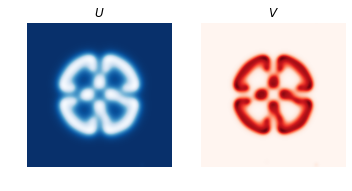

In [12]:
plot_diffusion(U,V, name='100noise')

In [ ]:
U,V = diffusion_eq(Ntime, Nspace, Du, Dv, dx, dt, f, k, animation=False, noise_interval=10)
plot_diffusion(U,V, name='10noise')

iteration  0
iteration  100
iteration  200
iteration  300
iteration  400
iteration  500
iteration  600
iteration  700
iteration  800
iteration  900
iteration  1000
iteration  1100
iteration  1200
iteration  1300
iteration  1400
iteration  1500
iteration  1600
iteration  1700
iteration  1800
iteration  1900
iteration  2000
iteration  2100
iteration  2200
iteration  2300
iteration  2400
iteration  2500
iteration  2600
iteration  2700
iteration  2800
iteration  2900
iteration  3000
iteration  3100
iteration  3200
iteration  3300
iteration  3400
iteration  3500
iteration  3600
iteration  3700
iteration  3800
iteration  3900
iteration  4000
iteration  4100
iteration  4200
iteration  4300
iteration  4400
iteration  4500
iteration  4600
iteration  4700
iteration  4800
iteration  4900
iteration  5000
iteration  5100
iteration  5200
iteration  5300
iteration  5400
iteration  5500
iteration  5600
iteration  5700
iteration  5800
iteration  5900
iteration  6000
iteration  6100
iteration  6200
iter

In [ ]:
U,V = diffusion_eq(Ntime, Nspace, Du, Dv, dx, dt, f, k, animation=False, noise_interval=Ntime)
plot_diffusion(U,V, name='nonoise')